 IMPORTING THE LIBRARIES:

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

LOADING THE DATASET:

In [7]:
df=pd.read_csv("employee_promotion.csv")

In [8]:
print(df)

       employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0 

In [9]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


DATA PRE-PROCESSING:

In [10]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
Le=LabelEncoder()

In [15]:
df['department']=Le.fit_transform(df['department'])
df['region']=Le.fit_transform(df['region'])
df['education']=Le.fit_transform(df['education'])
df['gender']=Le.fit_transform(df['education'])
df['recruitment_channel']=Le.fit_transform(df['recruitment_channel'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  int64  
 2   region                54808 non-null  int64  
 3   education             54808 non-null  int64  
 4   gender                54808 non-null  int64  
 5   recruitment_channel   54808 non-null  int64  
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 5.4 MB


In [17]:
df.dropna(inplace=True)

In [18]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

DATA VISUALIZATION:

In [27]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='recruitment_channel', ylabel='count'>

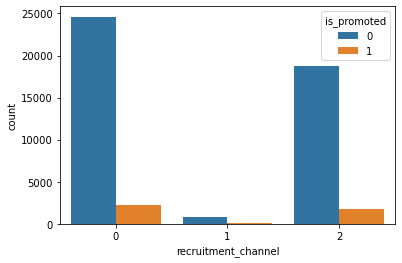

In [28]:
sns.countplot(df['recruitment_channel'],hue
              =df['is_promoted'])

<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

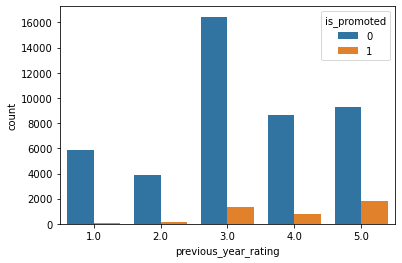

In [29]:
sns.countplot(df['previous_year_rating'],hue=df['is_promoted'])

NAIVE BAYES:

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
X=df.drop(['is_promoted'],axis=1)
Y=df['is_promoted']

In [35]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.80)

In [40]:
model=GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [45]:
Y_pred=model.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [47]:
from sklearn import metrics
print("accuracy",metrics.accuracy_score(Y_test,Y_pred))

accuracy 0.9159100902718502
